In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
tv_df = pd.read_csv('tv_series_data.csv')

In [3]:
tv_df.head(1)

tconst          primaryTitle        genres  numVotes  averageRating  \
0  tt0040053  The Ed Sullivan Show  Comedy,Music      1124            7.8   

   startYear                   SeriesName  
0     1948.0  The Ed Sullivan Show (1948)

In [4]:
movies_df = pd.read_csv('movie_data.csv')

C:\Users\Cisco\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
movies_df.head(1)

imdb_title_id       title original_title  year date_published    genre  \
0     tt0000009  Miss Jerry     Miss Jerry  1894     1894-10-09  Romance   

   duration country language         director  ...  \
0        45     USA     None  Alexander Black  ...   

                                              actors  \
0  Blanche Bayliss, William Courtenay, Chauncey D...   

                                         description avg_vote votes  budget  \
0  The adventures of a female reporter in the 1890s.      5.9   154     NaN   

   usa_gross_income worlwide_gross_income metascore reviews_from_users  \
0               NaN                   NaN       NaN                1.0   

   reviews_from_critics  
0                   2.0  

[1 rows x 22 columns]

# 1) Data Cleaning and Wrangling

#   1.1) Movies

In [6]:
from tqdm import tqdm
from time import sleep
from imdb import IMDb

In [7]:
# Drop unnecessary columns for our analysis

movies_df.drop(columns= ['original_title', 'language','reviews_from_users','reviews_from_critics','usa_gross_income',
                      'worlwide_gross_income','metascore','budget'], inplace= True)

In [8]:
movies_df.head()

imdb_title_id                        title  year date_published  \
0     tt0000009                   Miss Jerry  1894     1894-10-09   
1     tt0000574  The Story of the Kelly Gang  1906     1906-12-26   
2     tt0001892               Den sorte drøm  1911     1911-08-19   
3     tt0002101                    Cleopatra  1912     1912-11-13   
4     tt0002130                    L'Inferno  1911     1911-03-06   

                       genre  duration           country  \
0                    Romance        45               USA   
1    Biography, Crime, Drama        70         Australia   
2                      Drama        53  Germany, Denmark   
3             Drama, History       100               USA   
4  Adventure, Drama, Fantasy        68             Italy   

                              director                                 writer  \
0                      Alexander Black                        Alexander Black   
1                         Charles Tait                           Charles Tait   
2                            Urban Gad  Urban Gad, Gebhard Schätzler-Perasini   
3                   Charles L. Gaskill                       Victorien Sardou   
4  Francesco Bertolini, Adolfo Padovan                        Dante Alighieri   

              production_company  \
0     Alexander Black Photoplays   
1                 J. and N. Tait   
2                       Fotorama   
3  Helen Gardner Picture Players   
4                    Milano Film   

                                              actors  \
0  Blanche Bayliss, William Courtenay, Chauncey D...   
1  Elizabeth Tait, John Tait, Norman Campbell, Be...   
2  Asta Nielsen, Valdemar Psilander, Gunnar Helse...   
3  Helen Gardner, Pearl Sindelar, Miss Fielding, ...   
4  Salvatore Papa, Arturo Pirovano, Giuseppe de L...   

                                         description  avg_vote  votes  
0  The adventures of a female reporter in the 1890s.       5.9    154  
1  True story of notorious Australian outlaw Ned ...       6.1    589  
2  Two men of high rank are both wooing the beaut...       5.8    188  
3  The fabled queen of Egypt's affair with Roman ...       5.2    446  
4  Loosely adapted from Dante's Divine Comedy and...       7.0   2237

In [9]:
# Replace with actualy date of movie release

movies_df.year.replace({'TV Movie 2019': '2019'}, inplace= True)
movies_df.date_published.replace({'TV Movie 2019': '2019-09-09'}, inplace = True)

In [10]:
# Check to make sure previous code worked

movies_df.loc[movies_df.date_published == 'TV Movie 2019']

Empty DataFrame
Columns: [imdb_title_id, title, year, date_published, genre, duration, country, director, writer, production_company, actors, description, avg_vote, votes]
Index: []

In [11]:
# Change data type to from object to datetime

movies_df.year = movies_df.year.astype(str).astype(int)
movies_df['date_published'] = pd.to_datetime(movies_df['date_published'])

In [12]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   imdb_title_id       85855 non-null  object        
 1   title               85855 non-null  object        
 2   year                85855 non-null  int32         
 3   date_published      85855 non-null  datetime64[ns]
 4   genre               85855 non-null  object        
 5   duration            85855 non-null  int64         
 6   country             85791 non-null  object        
 7   director            85768 non-null  object        
 8   writer              84283 non-null  object        
 9   production_company  81400 non-null  object        
 10  actors              85786 non-null  object        
 11  description         83740 non-null  object        
 12  avg_vote            85855 non-null  float64       
 13  votes               85855 non-null  int64     

In [13]:
movies_df.head(1)

imdb_title_id       title  year date_published    genre  duration country  \
0     tt0000009  Miss Jerry  1894     1894-10-09  Romance        45     USA   

          director           writer          production_company  \
0  Alexander Black  Alexander Black  Alexander Black Photoplays   

                                              actors  \
0  Blanche Bayliss, William Courtenay, Chauncey D...   

                                         description  avg_vote  votes  
0  The adventures of a female reporter in the 1890s.       5.9    154

In [14]:
movies_df.shape

(85855, 14)

In [15]:
# We're going to narrow it down to the top 10,000 for computational feasability and practicality

movies_df = movies_df.sort_values('votes', ascending= False)[:10000]

In [16]:
movies_df.shape

(10000, 14)

In [17]:
movies_df.head(2)

imdb_title_id                 title  year date_published  \
28453     tt0111161  Le ali della libertà  1994     1995-02-10   
48078     tt0468569   Il cavaliere oscuro  2008     2008-07-23   

                      genre  duration  country           director  \
28453                 Drama       142      USA     Frank Darabont   
48078  Action, Crime, Drama       152  USA, UK  Christopher Nolan   

                                  writer         production_company  \
28453       Stephen King, Frank Darabont  Castle Rock Entertainment   
48078  Jonathan Nolan, Christopher Nolan               Warner Bros.   

                                                  actors  \
28453  Tim Robbins, Morgan Freeman, Bob Gunton, Willi...   
48078  Christian Bale, Heath Ledger, Aaron Eckhart, M...   

                                             description  avg_vote    votes  
28453  Two imprisoned men bond over a number of years...       9.3  2278845  
48078  When the menace known as the Joker wreaks havo...       9.0  2241615

In [18]:
# Set index to imdb title id

movies_df.set_index('imdb_title_id', inplace= True)

In [19]:
# Shall create a separate variable with all the IDs of the top 10,000 movies in a list

movies_index= movies_df.index

In [20]:
movies_index

Index(['tt0111161', 'tt0468569', 'tt1375666', 'tt0137523', 'tt0110912',
       'tt0109830', 'tt0133093', 'tt0120737', 'tt0167260', 'tt0068646',
       ...
       'tt3203620', 'tt0041859', 'tt0364986', 'tt0064106', 'tt0119324',
       'tt3703908', 'tt0099951', 'tt2054790', 'tt0950739', 'tt0294594'],
      dtype='object', name='imdb_title_id', length=10000)

In [21]:
# Instantiate IMDb()

ia = IMDb()

In [25]:
# Make a dictionary to store keywords from API with respect to their imbd id number

keywords_dict = {}

for movie_index in tqdm(movies_index):    # Displays the progress of the for-loop
    try:
        keywords_dict[movie_index] = ia.get_movie_keywords(movie_index[2:])['data']['keywords']
    except:
        keywords_dict[movie_index] = ''   

100%|██████████| 10000/10000 [1:04:10<00:00,  2.60it/s]


In [26]:
keywords_dict

{'tt0111161': ['wrongful-imprisonment',
  'based-on-the-works-of-stephen-king',
  'prison',
  'escape-from-prison',
  'voice-over-narration',
  '1940s',
  'police-brutality',
  'prison-cell-search',
  'friendship-between-men',
  'infidelity',
  'suicide',
  'suicide-of-villain',
  'cheating-wife',
  'harlot',
  'wrongful-conviction',
  'suicide-by-hanging',
  'life-imprisonment',
  'unfaithful-wife',
  'based-on-novella',
  'plot-twist',
  'prison-yard',
  'reference-to-rita-hayworth',
  'tunneling-to-freedom',
  'prison-guard',
  'sex-against-the-wall',
  'betrayer',
  'pig',
  'loose-woman',
  'easy-woman',
  'imprisonment',
  'carving',
  'tin-box',
  'reference-to-fort-hancock-texas',
  'voice-over-letter',
  'maggot',
  'trial',
  'suicide-by-gunshot',
  'suicide-of-friend',
  'missing-prisoner',
  'solitary-confinement',
  'surprise-ending',
  'sex-standing-up',
  'rita-hayworth-poster',
  'prison-library',
  'first-person-narration',
  'parole-board',
  'parole-hearing',
  'sexu

In [87]:
# Convert dictionary into a Dataframe with each word having their own columns

keywords_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in keywords_dict.items()])).transpose()
keywords_df

0                                   1    \
tt0111161  wrongful-imprisonment  based-on-the-works-of-stephen-king   
tt0468569              dc-comics                               joker   
tt1375666                  dream                    ambiguous-ending   
tt0137523               fighting                     surprise-ending   
tt0110912     nonlinear-timeline                            overdose   
...                          ...                                 ...   
tt3703908           21st-century                               child   
tt0099951                 proles                            gangster   
tt2054790           16th-century                   fight-for-justice   
tt0950739        knights-templar                      eastern-europe   
tt0294594                witness                         premonition   

                                                2                   3    \
tt0111161                                    prison  escape-from-prison   
tt0468569                                psychopath               clown   
tt1375666                              subconscious          mindbender   
tt0137523                        anti-establishment            insomnia   
tt0110912                                  drug-use       drug-overdose   
...                                             ...                 ...   
tt3703908                                      girl               house   
tt0099951  real-life-siblings-as-fictional-siblings             cockney   
tt2054790                                    france     male-pubic-hair   
tt0950739                          sword-and-shield              weapon   
tt0294594                                  mechanic        hit-by-a-car   

                                     4                    5    \
tt0111161           voice-over-narration                1940s   
tt0468569            criminal-mastermind         scarred-face   
tt1375666                surprise-ending      psycho-thriller   
tt0137523  multiple-personality-disorder       based-on-novel   
tt0110912                        bondage         drug-dealing   
...                                  ...                  ...   
tt3703908                         weapon      silencer-pistol   
tt0099951                      brutality               boxing   
tt2054790                           army  travesty-of-justice   
tt0950739                        cavalry              kingdom   
tt0294594                         church   strong-female-lead   

                                    6                        7    \
tt0111161              police-brutality       prison-cell-search   
tt0468569                     superhero            moral-dilemma   
tt1375666       strong-female-character             architecture   
tt0137523                 group-therapy          anti-conformity   
tt0110912                      neo-noir             car-accident   
...                                 ...                      ...   
tt3703908               silenced-pistol             silenced-gun   
tt0099951  brother-brother-relationship  mother-son-relationship   
tt2054790                  self-justice          seeking-justice   
tt0950739                          king              second-part   
tt0294594       strong-female-character                cornfield   

                                  8                      9    ...  863  864  \
tt0111161      friendship-between-men             infidelity  ...  NaN  NaN   
tt0468569                  clown-mask          dual-identity  ...  NaN  NaN   
tt1375666  psychological-manipulation    falling-from-height  ...  NaN  NaN   
tt0137523             anti-capitalism   disturbed-individual  ...  NaN  NaN   
tt0110912               dance-contest           black-comedy  ...  NaN  NaN   
...                               ...                    ...  ...  ...  ...   
tt3703908                   year-2015  psychological-warfare  ...  NaN  NaN   
tt0099951              london-eng

In [88]:
# We will then remove any NaN values, and join each keyword into one string

keywords_df = keywords_df.apply(lambda x: ','.join(x.dropna()), axis= 1)

In [89]:
keywords_df.head()

tt0111161    wrongful-imprisonment,based-on-the-works-of-st...
tt0468569    dc-comics,joker,psychopath,clown,criminal-mast...
tt1375666    dream,ambiguous-ending,subconscious,mindbender...
tt0137523    fighting,surprise-ending,anti-establishment,in...
tt0110912    nonlinear-timeline,overdose,drug-use,drug-over...
dtype: object

In [93]:
# Convert back to DataFrame and rename column

keywords_df = pd.DataFrame(keywords_df)
keywords_df.rename(columns= {0: 'keywords'}, inplace= True)
keywords_df.head()

keywords
tt0111161  wrongful-imprisonment,based-on-the-works-of-st...
tt0468569  dc-comics,joker,psychopath,clown,criminal-mast...
tt1375666  dream,ambiguous-ending,subconscious,mindbender...
tt0137523  fighting,surprise-ending,anti-establishment,in...
tt0110912  nonlinear-timeline,overdose,drug-use,drug-over...

In [94]:
# Save dataframe to folder so we don't have to re-run above code

keywords_df.to_csv(path_or_buf= 'keywords_df.csv')

In [22]:
# Load csv file

keywords_df = pd.read_csv('keywords_df.csv')

In [23]:
keywords_df.head(1)

Unnamed: 0                                           keywords
0  tt0111161  wrongful-imprisonment,based-on-the-works-of-st...

In [24]:
# Rename column to match that from our original data

keywords_df.rename(columns= {'Unnamed: 0': 'imdb_title_id'}, inplace= True)

In [25]:
keywords_df.columns

Index(['imdb_title_id', 'keywords'], dtype='object')

In [26]:
# Set the title id column as the dataframe index

keywords_df.set_index('imdb_title_id', inplace= True)

In [27]:
# Join the keywords_df dataframe with the movies_df dataframe created previously with the matching imdb_title_id

movies = movies_df.join(keywords_df, how='inner')

In [28]:
movies.head(1)

title  year date_published  genre  duration  \
imdb_title_id                                                               
tt0111161      Le ali della libertà  1994     1995-02-10  Drama       142   

              country        director                        writer  \
imdb_title_id                                                         
tt0111161         USA  Frank Darabont  Stephen King, Frank Darabont   

                      production_company  \
imdb_title_id                              
tt0111161      Castle Rock Entertainment   

                                                          actors  \
imdb_title_id                                                      
tt0111161      Tim Robbins, Morgan Freeman, Bob Gunton, Willi...   

                                                     description  avg_vote  \
imdb_title_id                                                                
tt0111161      Two imprisoned men bond over a number of years...       9.3   

                 votes                                           keywords  
imdb_title_id                                                              
tt0111161      2278845  wrongful-imprisonment,based-on-the-works-of-st...

# 1.2) TV Series

In [29]:
# For TV series shall perform the same steps as we did in the Section 1.1

tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6679 entries, 0 to 6678
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         6679 non-null   object 
 1   primaryTitle   6679 non-null   object 
 2   genres         6679 non-null   object 
 3   numVotes       6679 non-null   int64  
 4   averageRating  6679 non-null   float64
 5   startYear      6678 non-null   float64
 6   SeriesName     6679 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 365.4+ KB


In [30]:
# Look for any NaN values

tv_df.loc[tv_df.startYear.isna()]

tconst                    primaryTitle  genres  numVotes  \
2615  tt10042110  BOSS: Baap of Special Services  Action      1976   

      averageRating  startYear                         SeriesName  
2615            8.0        NaN  BOSS: Baap of Special Services ()

In [31]:
# Replace NaN value with the year the tv series came out

tv_df.startYear.fillna(2019, inplace= True)

In [32]:
# Change data type in column to integer

tv_df.startYear = tv_df.startYear.astype(int)

In [33]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6679 entries, 0 to 6678
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         6679 non-null   object 
 1   primaryTitle   6679 non-null   object 
 2   genres         6679 non-null   object 
 3   numVotes       6679 non-null   int64  
 4   averageRating  6679 non-null   float64
 5   startYear      6679 non-null   int32  
 6   SeriesName     6679 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 339.3+ KB


In [34]:
tv_df.shape

(6679, 7)

In [35]:
# Sort dataframe in ascending order from most votes to least - Although not entirely necessary for the tv datafram

tv_df = tv_df.sort_values('numVotes', ascending= False)

In [39]:
# Change name of column with id values

tv_df.rename(columns= {'tconst': 'imdb_tv_id'}, inplace= True)

In [40]:
# Set the IDs of each TV series to index

tv_df.set_index('imdb_tv_id', inplace= True)

In [41]:
tv_df.head(1)

primaryTitle                  genres  numVotes  averageRating  \
imdb_tv_id                                                                     
tt0944947   Game of Thrones  Action,Adventure,Drama   1760872            9.3   

            startYear              SeriesName  
imdb_tv_id                                     
tt0944947        2011  Game of Thrones (2011)

In [42]:
# Make a separate list of the IDs of each tv series

tv_indexes = tv_df.index

In [43]:
tv_indexes

Index(['tt0944947', 'tt0903747', 'tt1520211', 'tt0108778', 'tt4574334',
       'tt1475582', 'tt0898266', 'tt0773262', 'tt0460649', 'tt7366338',
       ...
       'tt0239185', 'tt0294177', 'tt0053496', 'tt0457544', 'tt0448300',
       'tt2256612', 'tt0158421', 'tt1872328', 'tt1329291', 'tt0163488'],
      dtype='object', name='imdb_tv_id', length=6679)

In [185]:
# Make a dictionary to store keywords from API with respect to their imbd id number

tv_keywords_dict= {}

for tv_index in tqdm(tv_indexes):
    try:
        tv_keywords_dict[tv_index] = ia.get_movie_keywords(tv_index[2: ])['data']['keywords']
    except:
        tv_keywords_dict[tv_index] = ''

 57%|█████▋    | 3823/6679 [35:50<25:23,  1.87it/s]   2021-05-17 22:01:16,311 CRITICAL [imdbpy] C:\Users\Cisco\anaconda3\lib\site-packages\imdb\_exceptions.py:34: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt2309312/keywords', 'proxy': '', 'exception type': 'IOError', 'original exception': URLError(TimeoutError(10060, 'A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond', None, 10060, None))},); kwds: {}
Traceback (most recent call last):
  File "C:\Users\Cisco\anaconda3\lib\urllib\request.py", line 1319, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "C:\Users\Cisco\anaconda3\lib\http\client.py", line 1252, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "C:\Users\Cisco\anaconda3\lib\http\client.py", line 1298, in _send_r

100%|██████████| 6679/6679 [1:06:57<00:00,  1.66it/s]


In [274]:
tv_keywords_dict

{'tt0944947': ['based-on-novel',
  'dragon',
  'politics',
  'nudity',
  'queen',
  'incest',
  'war-between-families',
  'bloody-violence',
  'twins-incest',
  'brother-sister-incest',
  'bastard-son',
  'civil-war',
  'king',
  'kingdom',
  'family-conflict',
  'prince',
  'husband-wife-relationship',
  'royalty',
  'dwarf',
  'murder',
  'swordplay',
  'witchcraft',
  'forced-marriage',
  'male-nudity',
  'abuse-of-power',
  'prostitution',
  'sorcery',
  'vow-of-chastity',
  'child-bride',
  'political-conflict',
  'brother-sister-relationship',
  'infidelity',
  'magic',
  'illegitimate-son',
  'family-relationships',
  'mythical-kingdom',
  'sex-scene',
  'secret',
  'fictional-war',
  'horseback-riding',
  'vow-of-abstinence',
  'evil-king',
  'betrayal',
  'usurper',
  'sibling-rivalry',
  'archery',
  'priestess',
  'rivalry',
  'mother-son-relationship',
  'nobility',
  'belief-in-gods',
  'religious-differences',
  'sword-and-sorcery',
  'exile',
  'female-nudity',
  'sword-

In [275]:
# Convert dictionary into a Dataframe with each word having their own columns
# Rejoin each keyword into a string 

tv_keywords_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in tv_keywords_dict.items()])).transpose()
tv_keywords_df = tv_keywords_df.apply(lambda x: ','.join(x.dropna()), axis= 1)

In [276]:
# Return data to dataframe mode
# Rename columns appropriately

tv_keywords_df = pd.DataFrame(tv_keywords_df)
tv_keywords_df.rename(columns= {0: 'tv_keywords'}, inplace= True)

In [277]:
# Save data to folder

tv_keywords_df.to_csv(path_or_buf= 'tv_keywords_df.csv')

In [122]:
# Load data to folder

tv_keywords_df = pd.read_csv('tv_keywords_df.csv')

In [123]:
# With the data loaded we can rename the columns of IDs appropriately

tv_keywords_df.rename(columns= {'Unnamed: 0': 'imdb_tv_id'}, inplace= True)

In [124]:
tv_keywords_df.head()

imdb_tv_id                                        tv_keywords
0  tt0944947  based-on-novel,dragon,politics,nudity,queen,in...
1  tt0903747  cancer,crystal-meth,albuquerque-new-mexico,che...
2  tt1520211  zombie,survival,post-apocalypse,based-on-comic...
3  tt0108778  friendship,friend,new-york-city,roommate,divor...
4  tt4574334  government-conspiracy,cover-up,1980s,mk-ultra,...

In [125]:
tv_keywords_df.shape

(6679, 2)

In [126]:
tv_keywords_df.set_index('imdb_tv_id', inplace= True)

In [127]:
tv_series = tv_df.join(tv_keywords_df, how='inner')

In [128]:
tv_series

primaryTitle                  genres  numVotes  \
imdb_tv_id                                                            
tt0944947         Game of Thrones  Action,Adventure,Drama   1760872   
tt0903747            Breaking Bad    Crime,Drama,Thriller   1454727   
tt1520211        The Walking Dead   Drama,Horror,Thriller    850008   
tt0108778                 Friends          Comedy,Romance    822174   
tt4574334         Stranger Things    Drama,Fantasy,Horror    815075   
...                           ...                     ...       ...   
tt2256612            Crimi Clowns   Comedy,Crime,Thriller      1002   
tt0158421     Vengeance Unlimited             Crime,Drama      1001   
tt1872328                  Gosick  Animation,Comedy,Drama      1001   
tt1329291   Steven Seagal: Lawman              Reality-TV      1001   
tt0163488              Robot Wars        Action,Game-Show      1001   

            averageRating  startYear                    SeriesName  \
imdb_tv_id                                                           
tt0944947             9.3       2011        Game of Thrones (2011)   
tt0903747             9.5       2008           Breaking Bad (2008)   
tt1520211             8.2       2010       The Walking Dead (2010)   
tt0108778             8.9       1994                Friends (1994)   
tt4574334             8.7       2016        Stranger Things (2016)   
...                   ...        ...                           ...   
tt2256612             8.1       2012           Crimi Clowns (2012)   
tt0158421             8.8       1998    Vengeance Unlimited (1998)   
tt1872328             7.4       2011                 Gosick (2011)   
tt1329291             6.1       2009  Steven Seagal: Lawman (2009)   
tt0163488             7.3       1998             Robot Wars (1998)   

                                                  tv_keywords  
imdb_tv_id                                                     
tt0944947   based-on-novel,dragon,politics,nudity,queen,in...  
tt0903747   cancer,crystal-meth,albuquerque-new-mexico,che...  
tt1520211   zombie,survival,post-apocalypse,based-on-comic...  
tt0108778   friendship,friend,new-york-city,roommate,divor...  
tt4574334   government-conspiracy,cover-up,1980s,mk-ultra,...  
...                                                       ...  
tt2256612                                                 NaN  
tt0158421                             1990s,vengeance,revenge  
tt1872328   anime,year-1924,fictional-country,europe,japan...  
tt1329291   louisiana,actor-playing-himself,part-time-job,...  
tt0163488   g4tv,robot,remote-control,fighting-game,non-fi...  

[6679 rows x 7 columns]

# 2) Exploratory Data Analysis

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

#   2.1) Movies

In [98]:
# Checking to see which keywords will fail my for-loop for finding length of characters in keyword

for keywords in movies['keywords']:
    if isinstance(keywords, float) : 
        print(keywords)
    else:
        continue
    
    

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [129]:
# Change the NaN values to 'None'

movies.keywords.fillna('None', inplace= True)
movies.keywords.isnull().value_counts()

False    10000
Name: keywords, dtype: int64

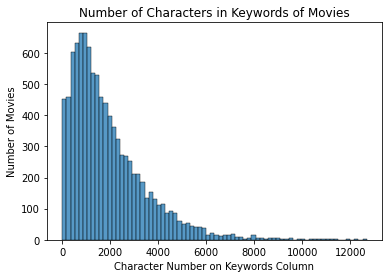

In [172]:
# A for-loop to get length of the keywords of each movie

movie_char_count = []

for keywords in movies['keywords']:
    n_char = len(keywords)
    movie_char_count.append(n_char)
    
_ = sns.histplot(movie_char_count)
_ = plt.ylabel('Number of Movies')
_ = plt.xlabel('Character Number on Keywords Column')
_ = plt.title('Number of Characters in Keywords of Movies')

In [142]:
print(np.mean(movie_char_count))

1910.8302


In [ ]:
# We can see from the chart and the average number of characters in the keywords that the distribution is right tailed.

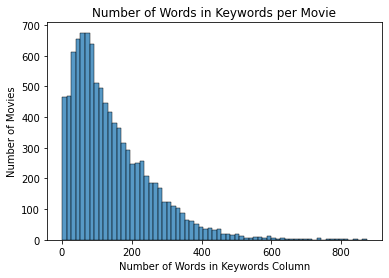

In [167]:
# We'll do the same now, except we will use the number of words instead

movie_word_count = []

for keyword in movies['keywords']:
    word_count = len(keyword.split(','))
    movie_word_count.append(word_count)
    
_ = sns.histplot(movie_word_count)
_ = plt.ylabel('Number of Movies')
_ = plt.xlabel('Number of Words in Keywords Column')
_ = plt.title('Number of Words in Keywords per Movie')

In [146]:
print(np.mean(movie_word_count))

143.1864


In [147]:
# As shown above, the distribution of the graph is right tailed. This makes sense as they are intuitively correlated.
# This tells us that alot of the movies do not have keywords

# 2.1) TV Series

In [148]:
# We shall perform the same steps as we did in the Movie section

tv_series.tv_keywords.fillna('None', inplace= True)
tv_series.tv_keywords.isnull().value_counts()

False    6679
Name: tv_keywords, dtype: int64

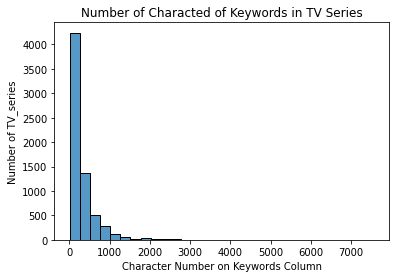

In [179]:

tv_char_count = []

for tv_keyword in tv_series['tv_keywords']:
    n_char = len(tv_keyword)
    tv_char_count.append(n_char)
    
_ = sns.histplot(tv_char_count, bins= 30)
_ = plt.ylabel('Number of TV_series')
_ = plt.xlabel('Character Number on Keywords Column')
_ = plt.title('Number of Characted of Keywords in TV Series')

In [154]:
print(np.mean(tv_char_count))

288.66656685132506


In [ ]:
# The distribution of the graph is right tailed with majority of the tv series having less that 250 characters in their
# keywords

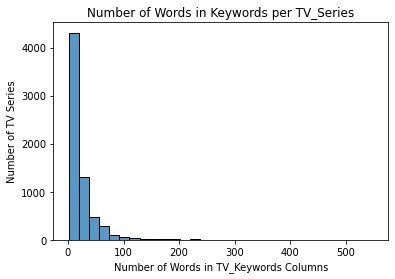

In [181]:
tv_word_count = []
for tv_keyword in tv_series['tv_keywords']:
    word_count = len(tv_keyword.split(','))
    tv_word_count.append(word_count)
    
_ = sns.histplot(tv_word_count, bins= 30)
_ = plt.ylabel('Number of TV Series')
_ = plt.xlabel('Number of Words in TV_Keywords Columns')
_ = plt.title('Number of Words in Keywords per TV_Series')

In [180]:
print(np.mean(tv_word_count))

21.814044018565653


In [ ]:
# The graph above is right tailed with majority of the movies having less that 20 keywords